Import the Data

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

In [2]:
# Setting the file path
whale_csv_path = Path("../Resources/whale_navs.csv")

# Import the CSV file and setting the DatetimeIndex 
whale_df = pd.read_csv(whale_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True)

# Review the first 5 rows of the DataFrame
display(whale_df.head())
display(whale_df.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [3]:
# Calculate daily returns for Whale Portfolio
daily_returns = whale_df.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


Quantative Analysis

Analyze the Performance

<AxesSubplot:title={'center':'Daily Return: Whale Portfolio vs. the S&P 500'}, xlabel='date'>

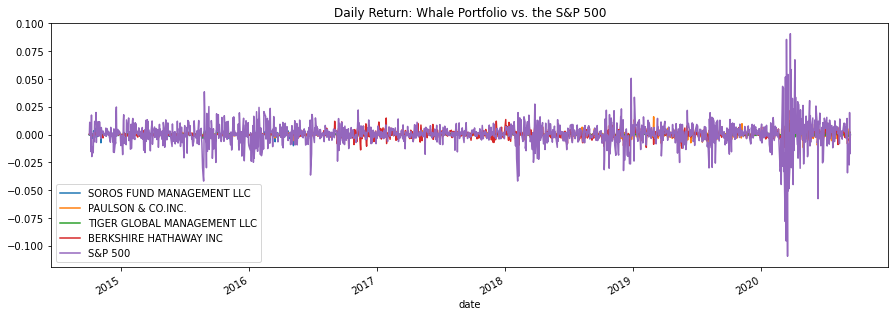

In [4]:
# Plot the daily return data of whale portfolio including the S&P 500 
daily_returns.plot(figsize=(15,5), title="Daily Return: Whale Portfolio vs. the S&P 500")

In [5]:
# Calculate the cumulative returns of Whale Portfolio and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.tail(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.012645,-0.041813,0.055714,0.244856,0.762645
2020-09-08,-0.014360,-0.043622,0.054373,0.238608,0.714484
2020-09-09,-0.013261,-0.041591,0.057221,0.240858,0.748341
2020-09-10,-0.014502,-0.040260,0.055539,0.237883,0.717983
2020-09-11,-0.014914,-0.042113,0.055081,0.236625,0.718858


<AxesSubplot:title={'center':'Cumulative Return: Whale Portfolio vs. the S&P 500'}, xlabel='date'>

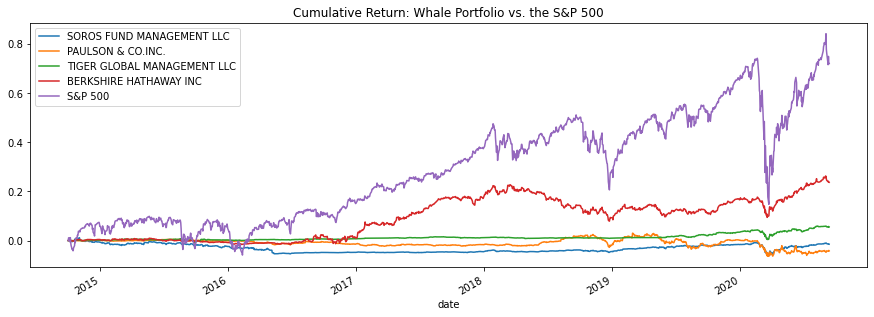

In [6]:
# Plot the cumulative returns of the 4 fund portfolios and the S&P 500
cumulative_returns.plot(figsize=(15,5), title="Cumulative Return: Whale Portfolio vs. the S&P 500")

Question Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

Answer: Non of the funds under 'Whale Portfolio' outperforms the S&P 500 index.


Analyze the Performance

<AxesSubplot:title={'center':'Daily Return volatility: Whale Portfolio vs. S&P Index'}>

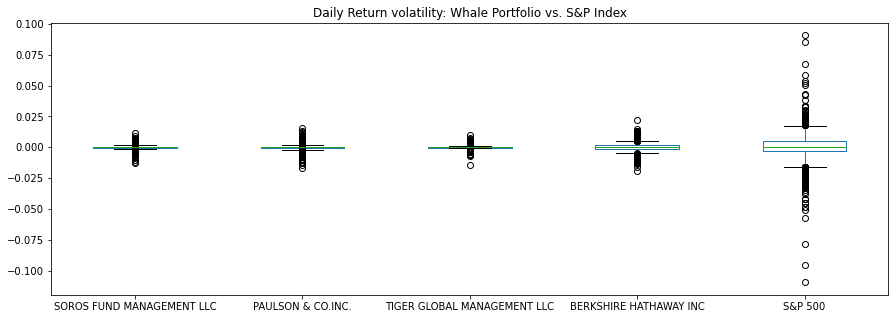

In [7]:
# Plot the Box plot of Daily Return to visualize the volatility of the 4 funds and the S&P 500
daily_returns.plot(figsize=(15,5), kind="box", title="Daily Return volatility: Whale Portfolio vs. S&P Index")

<AxesSubplot:title={'center':'Daily Return volatility: Whale Portfolio'}>

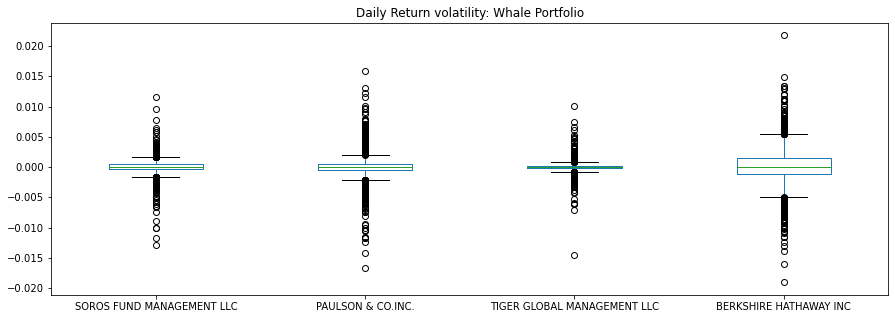

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
whale_df1 = whale_df.drop(columns='S&P 500')
whale_df1

# Calculate daily returns for Whale Portfolio only
# Drop any rows with all missing values
daily_returns1 = whale_df1.pct_change().dropna()

# Create box plots to reflect the return data for only the 4 fund portfolios
daily_returns1.plot(figsize=(15,5), kind="box", title="Daily Return volatility: Whale Portfolio")

Question Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

Answer: The most volatile fund is Berkshire Hathaway Inc and Paulson & Co.Inc while the least voluntile fund is Tiger Global Management LLC


Analyze the Risk

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
standard_deviation = whale_df.std()

# Display the result
display(standard_deviation.head())

# Sorted the standard deviations from smallest to largest
standard_deviation_sorted = standard_deviation.sort_values()

# Display the result
display(standard_deviation_sorted.head())

SOROS FUND MANAGEMENT LLC       0.485997
PAULSON & CO.INC.               0.240011
TIGER GLOBAL MANAGEMENT LLC     0.751144
BERKSHIRE HATHAWAY INC          4.185067
S&P 500                        41.005779
dtype: float64

PAULSON & CO.INC.               0.240011
SOROS FUND MANAGEMENT LLC       0.485997
TIGER GLOBAL MANAGEMENT LLC     0.751144
BERKSHIRE HATHAWAY INC          4.185067
S&P 500                        41.005779
dtype: float64

In [10]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
annualized_standard_deviation = standard_deviation * np.sqrt(252)

# Sorted the annual standard deviations from smallest to largest
annualized_standard_deviation_sorted = annualized_standard_deviation.sort_values()

# Display the result
display(annualized_standard_deviation_sorted.head())

PAULSON & CO.INC.                3.810063
SOROS FUND MANAGEMENT LLC        7.714968
TIGER GLOBAL MANAGEMENT LLC     11.924046
BERKSHIRE HATHAWAY INC          66.435883
S&P 500                        650.946561
dtype: float64

<AxesSubplot:title={'center':'Daily Return STD: Whale Portfolio vs. the S&P 500'}, xlabel='date'>

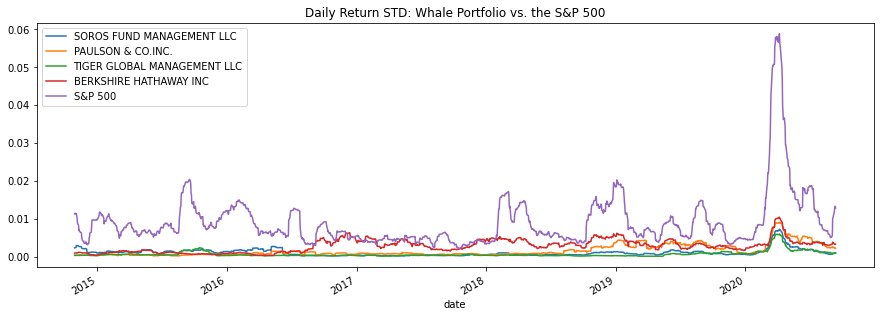

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window,
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
daily_returns.rolling(window=21).std().plot(figsize=(15,5), title="Daily Return STD: Whale Portfolio vs. the S&P 500")

<AxesSubplot:title={'center':'Daily Return STD: Whale Portfolio vs. the S&P 500'}, xlabel='date'>

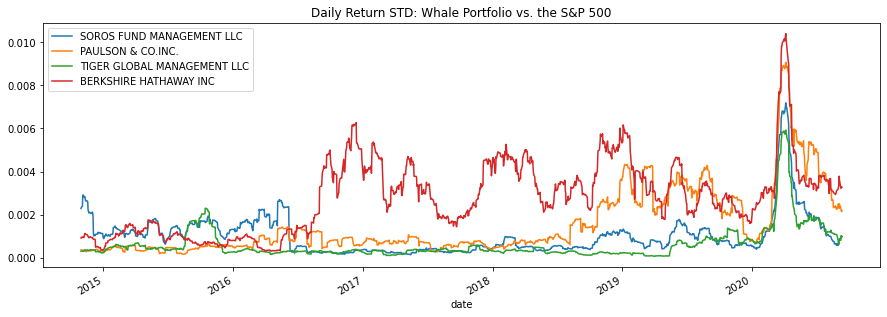

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
daily_returns1.rolling(window=21).std().plot(figsize=(15,5), title="Daily Return STD: Whale Portfolio vs. the S&P 500")

Question 1 Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

Answer 1: None

Question 2 Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

Answer 2: Not in Year 2015-2016, but posed same risk pattern from 2017 and on, esp. in Year 2020

Question 3 Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

Answer 3 # Berkshire Hathway Inc; however, all portfolios posed more risk during COVID time (voluntile), esp. Berkshire Hathway Inc and Paulson & Co 


Analyze the Risk-Return Profile

In [13]:
# Calculate the annual average return for whale portfolios and the S&P 500
# Use 252 as the number of trading days in the year
average_annual_return = daily_returns.mean() * 252

# Display sorted value from smallest to largest
average_annual_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
sharpe_ratios = average_annual_return / annualized_standard_deviation

# Display sorted value from smallest to largest
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.001741
SOROS FUND MANAGEMENT LLC     -0.000296
S&P 500                        0.000166
BERKSHIRE HATHAWAY INC         0.000558
TIGER GLOBAL MANAGEMENT LLC    0.000767
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

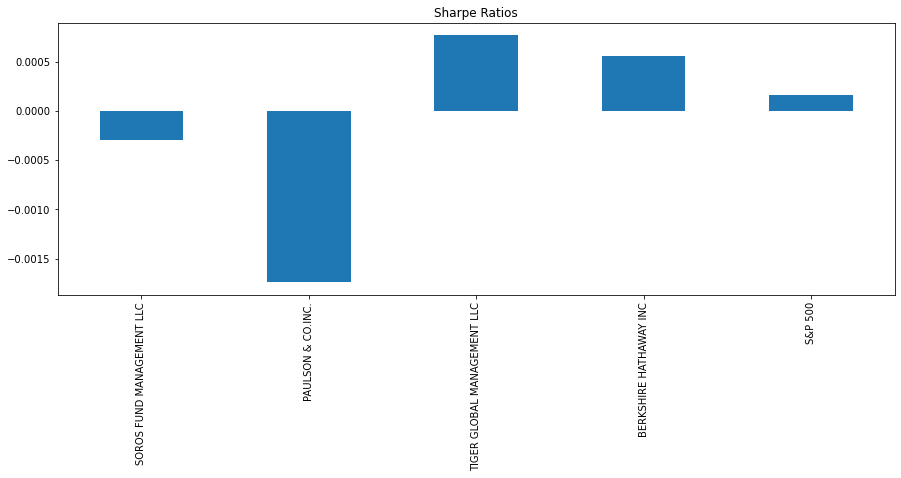

In [15]:
# Visualize the Sharpe ratios as a bar chart
sharpe_ratios.plot.bar(figsize=(15,5), title="Sharpe Ratios")

Question Which of the four portfolios offers the best risk-return profile? Which offers the worst?

Answer: The best - Tiger Global Management LLC / The worst - Paulson & Co Inc.


Diversify the Portfolio

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
rolling_variance = daily_returns['S&P 500'].rolling(window=60).var()
rolling_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

PORTFOLIO 1

In [17]:
# Calculate the covariance using a 60-day rolling window 
rolling_tiger_covariance = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])

# Review the last five rows of the covariance data
rolling_tiger_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [18]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
rolling_tiger_beta = rolling_tiger_covariance / rolling_variance

# Review the last five rows of the beta information
rolling_tiger_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [19]:
# Calculate the average of the 60-day rolling beta
average_rolling_tiger_beta = rolling_tiger_beta.mean()
average_rolling_tiger_beta

0.03093001487238774

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Tiger Global Management Fund'}, xlabel='date'>

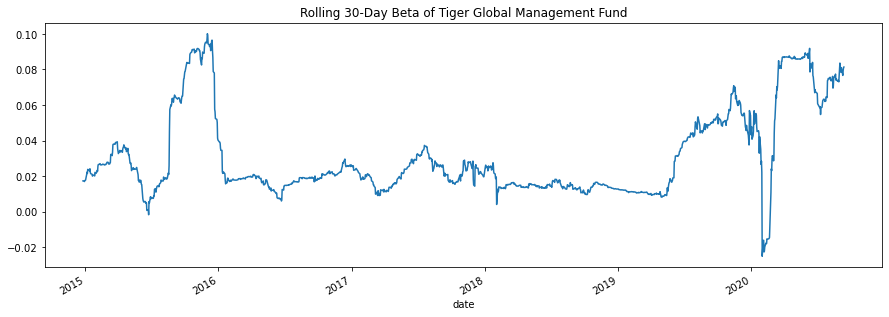

In [20]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
rolling_tiger_beta.plot(figsize=(15, 5), title='Rolling 30-Day Beta of Tiger Global Management Fund')

PORTFOLIO 2

In [21]:
# Calculate the covariance using a 60-day rolling window 
rolling_berk_covariance = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns['S&P 500'])

# Review the last five rows of the covariance data
rolling_berk_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [22]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
rolling_berk_beta = rolling_berk_covariance / rolling_variance

# Review the last five rows of the beta information
rolling_berk_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [23]:
# Calculate the average of the 60-day rolling beta
average_rolling_berk_beta = rolling_tiger_beta.mean()
average_rolling_berk_beta

0.03093001487238774

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Berkshire Hathaway Fund'}, xlabel='date'>

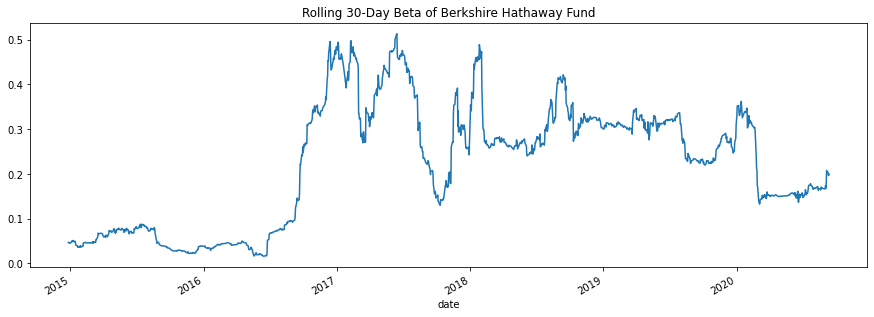

In [24]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
rolling_berk_beta.plot(figsize=(15, 5), title='Rolling 30-Day Beta of Berkshire Hathaway Fund')

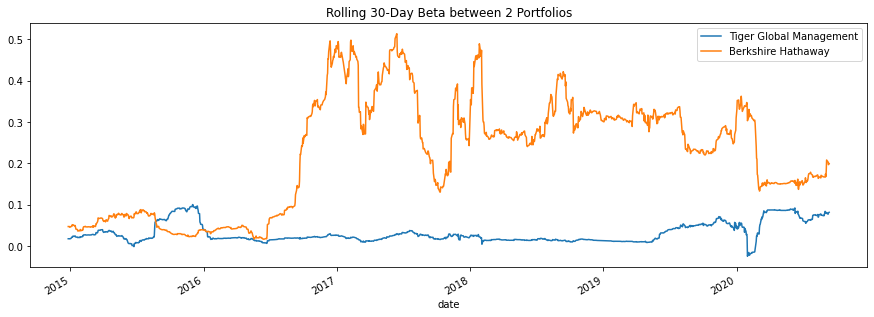

In [25]:
ax = rolling_tiger_beta.plot(figsize=(15, 5), title='Rolling 30-Day Beta between 2 Portfolios')
rolling_berk_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Tiger Global Management", "Berkshire Hathaway"])

uestion 1 Which of the two portfolios seem more sensitive to movements in the S&P 500?

Answer 1: Berkshire Hathaway fund

Question 2 Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

Answer 2: Tiger Global Management fund
